In [1]:
import numpy as np

data = np.loadtxt(fname='./linear_data.csv', delimiter='\t')

data -= data.mean(axis=0)
data /= data.std(axis=0)

x = data[:, :-1]
y = data[:, -1]

x.shape, y.shape

((1503, 5), (1503,))

In [2]:
N, M = x.shape

w = np.ones(M)
b = 0

S_w = np.zeros(M)
S_b = 0

S_w

array([0., 0., 0., 0., 0.])

In [3]:
def predict(x):
    return w.dot(x) + b


predict(x[0])

0.6590042695516543

In [4]:
def get_loss(x, y):
    pred = predict(x)
    loss = (pred - y)**2
    return loss


get_loss(x[0], y[0])

0.21258140154187277

In [5]:
def get_gradient(x, y):
    global w
    global b

    eps = 1e-3

    loss_before = get_loss(x, y)

    gradient_w = np.empty(M)
    for i in range(M):
        w[i] += eps
        loss_after = get_loss(x, y)
        w[i] -= eps
        gradient_w[i] = (loss_after - loss_before) / eps

    b += eps
    loss_after = get_loss(x, y)
    b -= eps
    gradient_b = (loss_after - loss_before) / eps

    return gradient_w, gradient_b


get_gradient(x[0], y[0])

(array([-0.61003339, -1.05581946,  1.66242713,  1.21242212, -0.59417855]),
 0.9231310135582593)

In [6]:
def total_loss():
    loss = 0
    for i in range(N):
        loss += get_loss(x[i], y[i])
    return loss

total_loss()

11073.905141728206

In [7]:
plt_x = []
plt_y = []
for epoch in range(2500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])

    # rmsprop 是对 ada_grad 的改进,在 ada_grad 中 lr 是单调递减的.
    # 但是在 rmsprop 中lr可能上升
    S_w = 0.2 * S_w + 0.8 * gradient_w**2
    S_b = 0.2 * S_b + 0.8 * gradient_b**2

    lr_w = 1e-2 / ((S_w + 1e-6)**0.5)
    lr_b = 1e-2 / ((S_b + 1e-6)**0.5)

    w -= gradient_w * lr_w
    b -= gradient_b * lr_b

    plt_x.append(epoch)
    plt_y.append(total_loss())

    if epoch % 150 == 0:
        print(epoch, lr_w, lr_b, total_loss())

0 [0.00274438 0.00777651 0.01071901 0.0025117  0.00379749] 0.0018173341750310754 10928.395326286814
150 [0.00325786 0.00171958 0.00215433 0.00436729 0.00246701] 0.001973535331185454 5085.690496355932
300 [0.04520824 0.0066458  0.00239551 0.00342688 0.00923815] 0.0042008242672635174 2631.757579925701
450 [0.00547762 0.00305773 0.00792833 0.00348157 0.00184887] 0.0043051963212081944 1108.2686007742573
600 [0.03505759 0.00315829 0.01254092 0.00650109 0.00148264] 0.004660386798006876 866.3876026071468
750 [0.00524296 0.0040299  0.01011704 0.00289687 0.00210475] 0.0037655645849864615 897.1027827164338
900 [0.00483301 0.02485723 0.00373174 0.00279067 0.04930885] 0.0036624897295978232 788.1928135735736
1050 [0.03675294 0.01406133 0.02563464 0.02746625 0.01596186] 0.022454335952567836 767.4615798234861
1200 [0.02107121 0.03215454 0.02504015 0.01776528 0.01898111] 0.017687181747407348 807.9041087215793
1350 [0.01060981 0.04843861 0.04141544 0.01049021 0.03215182] 0.0077285011021112635 893.86045

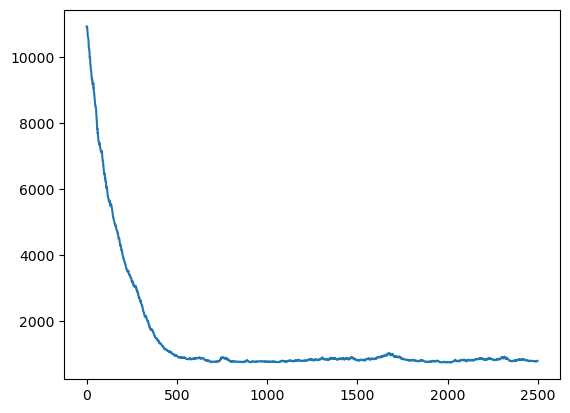

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(plt_x, plt_y)
plt.show()